In [1]:
import cv2

import numpy as np

from algorithms import NaiveMedianFilter

In [3]:
help(cv2.medianBlur)

Help on built-in function medianBlur:

medianBlur(...)
    medianBlur(src, ksize[, dst]) -> dst
    .   @brief Blurs an image using the median filter.
    .   
    .   The function smoothes an image using the median filter with the \f$\texttt{ksize} \times
    .   \texttt{ksize}\f$ aperture. Each channel of a multi-channel image is processed independently.
    .   In-place operation is supported.
    .   
    .   @note The median filter uses #BORDER_REPLICATE internally to cope with border pixels, see #BorderTypes
    .   
    .   @param src input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be
    .   CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.
    .   @param dst destination array of the same size and type as src.
    .   @param ksize aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...
    .   @sa  bilateralFilter, blur, boxFilter, GaussianBlur



In [4]:
from PIL import Image

In [5]:
img = Image.open("samples/Original.bmp")

In [6]:
arr = np.array(img)

In [7]:
arr.shape

(2073, 4176, 3)

In [11]:
smaller_arr = arr[:500, :500, :]

In [14]:
R = 25

blurred = cv2.medianBlur(smaller_arr, 2 * R + 1)

blurred_image = Image.fromarray(blurred)

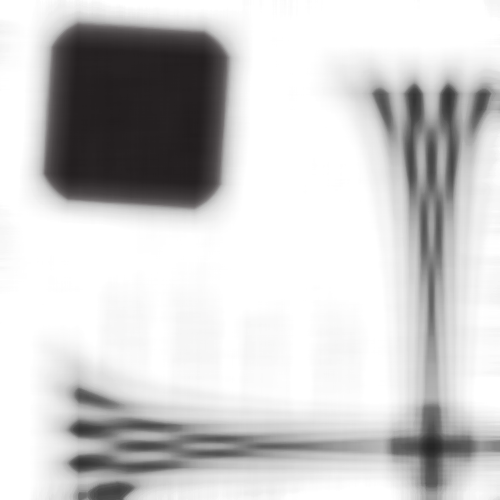

In [15]:
blurred_image

In [16]:
blurred.shape

(500, 500, 3)

In [19]:
help(cv2.copyMakeBorder)

Help on built-in function copyMakeBorder:

copyMakeBorder(...)
    copyMakeBorder(src, top, bottom, left, right, borderType[, dst[, value]]) -> dst
    .   @brief Forms a border around an image.
    .   
    .   The function copies the source image into the middle of the destination image. The areas to the
    .   left, to the right, above and below the copied source image will be filled with extrapolated
    .   pixels. This is not what filtering functions based on it do (they extrapolate pixels on-fly), but
    .   what other more complex functions, including your own, may do to simplify image boundary handling.
    .   
    .   The function supports the mode when src is already in the middle of dst . In this case, the
    .   function does not copy src itself but simply constructs the border, for example:
    .   
    .   @code{.cpp}
    .       // let border be the same in all directions
    .       int border=2;
    .       // constructs a larger image to fit both the image and th

In [20]:
h, w, c = smaller_arr.shape

In [29]:
padded_arr = cv2.copyMakeBorder(smaller_arr, R, R, R, R, cv2.BORDER_REPLICATE)

In [30]:
padded_arr.shape

(550, 550, 3)

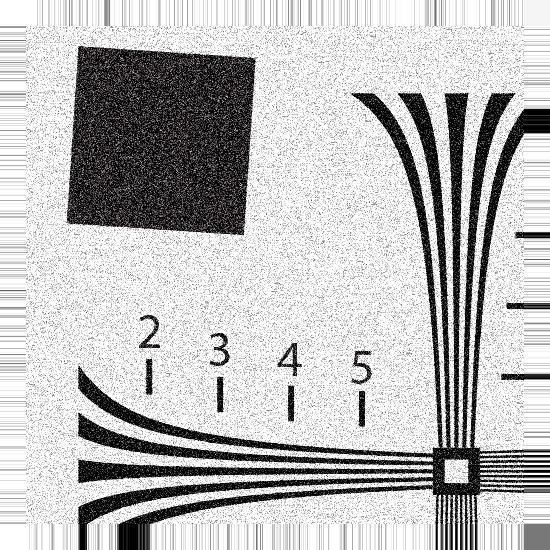

In [31]:
Image.fromarray(padded_arr)

In [61]:
my_blurred = np.zeros_like(smaller_arr)

In [62]:
my_blurred.shape

(500, 500, 3)

In [76]:
for i in range(h):
    for j in range(w):
        image_slice = padded_arr[i:i+2*R+1, j:j+2*R+1, :].transpose((2, 0, 1))
        
        elem_count = (2*R + 1) ** 2

        image_slice = image_slice.reshape((3, elem_count))
        medians = np.sort(image_slice, axis=-1)[:, elem_count // 2]
        
        my_blurred[i][j] = medians

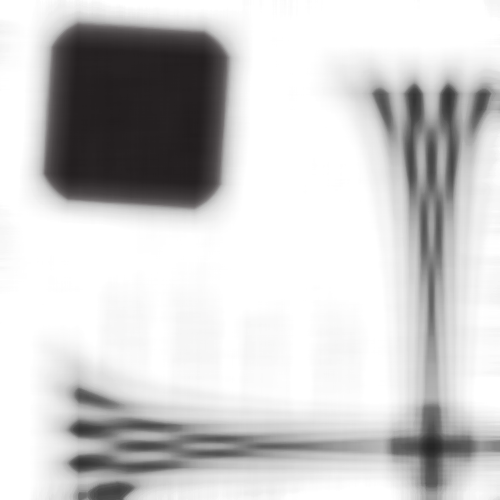

In [77]:
Image.fromarray(my_blurred)

In [78]:
np.allclose(blurred, my_blurred)

True